## Suport Vector Machine

### Nichtlineare SVM

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [9]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(7429) # setzt den Zufallszahlengenerator von NumPy auf einen bestimmten Startwert, in diesem Fall 7429. 

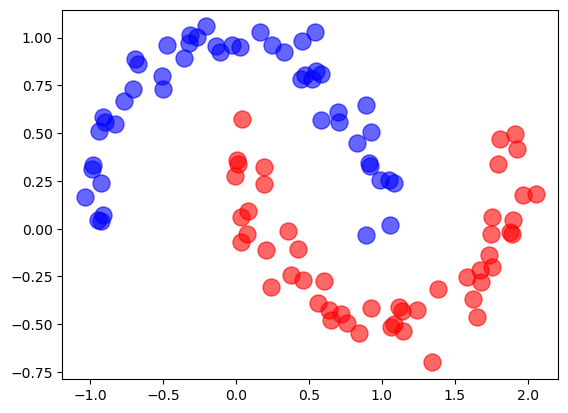

In [16]:
x = np.linspace(0,10)
xlim = [0,10]; ylim = [0,30]

from sklearn.datasets import make_moons
X, y = make_moons(100, noise=0.08, shuffle=True)

plt.scatter(X[y==1][:,0],X[y==1][:,1], s=150, marker='o',alpha=0.6, c='r')
plt.scatter(X[y==0][:,0],X[y==0][:,1], s=150, marker='o',alpha=0.6, c='b')

In [26]:
from sklearn.svm import SVC
model = SVC(kernel='rbf', C=1E6, gamma=1)
model.fit(X, y)
model.score(X, y)

1.0

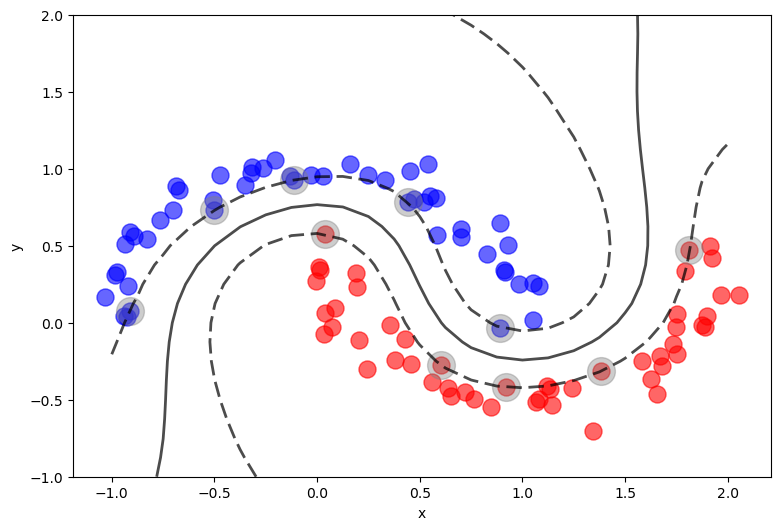

In [27]:
fig = plt.figure(1, figsize=(9, 6))

plt.scatter(X[y==1][:,0],X[y==1][:,1], s=150, marker='o',alpha=0.6, c='r')
plt.scatter(X[y==0][:,0],X[y==0][:,1], s=150, marker='o',alpha=0.6, c='b')

plt.xlabel('x'); plt.ylabel('y')

# model
from sklearn.svm import SVC
model1 = SVC(kernel='rbf', C=1E6, gamma=1.)
model1.fit(X, y)

NBINS = 25
xg = np.linspace(-1, 2, NBINS)
yg = np.linspace(-1, 2, NBINS)
Yg, Xg = np.meshgrid(yg, xg)
xy = np.vstack([Xg.ravel(), Yg.ravel()]).T
P1 = model1.decision_function(xy).reshape(Xg.shape)

# decision boundary and margins
cont = plt.contour(Xg, Yg, P1, colors='k',linewidth=9,
                levels=[-1,0,1], alpha=0.7,
                linestyles=['--','-','--'])
plt.setp(cont.collections,lw=2)
# support vectors
plt.scatter(model1.support_vectors_[:, 0],model1.support_vectors_[:, 1],s=400, linewidth=1,  facecolors='grey',alpha=0.39);

### overfitting

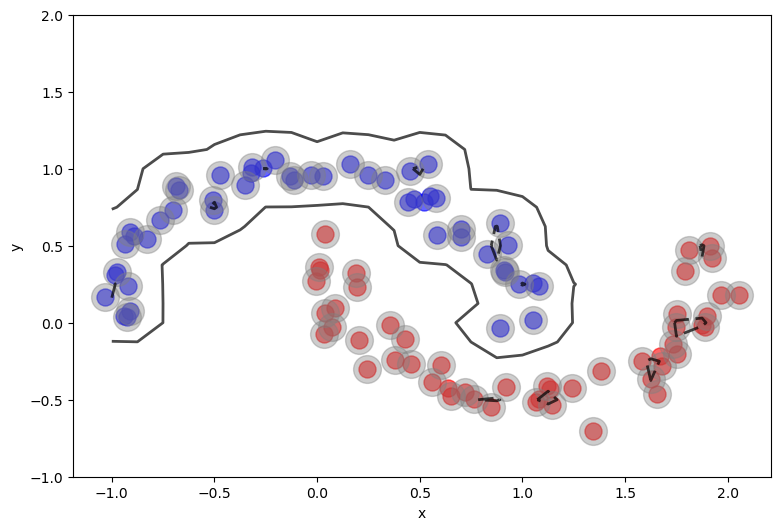

In [28]:
fig = plt.figure(1, figsize=(9, 6))

plt.scatter(X[y==1][:,0],X[y==1][:,1], s=150, marker='o',alpha=0.6, c='r')
plt.scatter(X[y==0][:,0],X[y==0][:,1], s=150, marker='o',alpha=0.6, c='b')

plt.xlabel('x')
plt.ylabel('y')

# model
model1 = SVC(kernel='rbf', C=1E6, gamma=1E2)
model1.fit(X, y)

NBINS = 25
xg = np.linspace(-1, 2, NBINS)
yg = np.linspace(-1, 2, NBINS)
Yg, Xg = np.meshgrid(yg, xg)
xy = np.vstack([Xg.ravel(), Yg.ravel()]).T
P1 = model1.decision_function(xy).reshape(Xg.shape)

# decision boundary and margins
cont = plt.contour(Xg, Yg, P1, colors='k',linewidth=9,
                levels=[-1,0,1], alpha=0.7,
                linestyles=['--','-','--'])
plt.setp(cont.collections,lw=2)
# support vectors
plt.scatter(model1.support_vectors_[:, 0],model1.support_vectors_[:, 1],s=400, linewidth=1, facecolors='grey',alpha=0.39);

### Uderfitting

Text(0, 0.5, 'y')

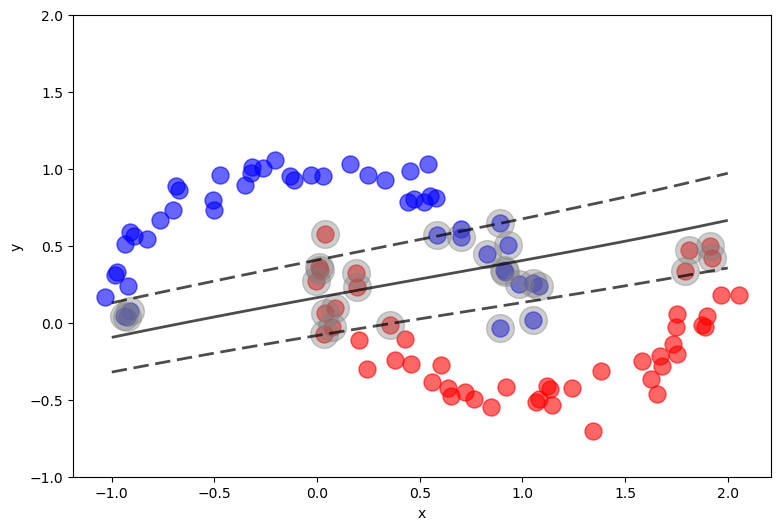

In [29]:
fig = plt.figure(1, figsize=(9, 6))

plt.scatter(X[y==1][:,0],X[y==1][:,1], s=150, marker='o',alpha=0.6, c='r')
plt.scatter(X[y==0][:,0],X[y==0][:,1], s=150, marker='o',alpha=0.6, c='b')

# model
from sklearn.svm import SVC
model1 = SVC(kernel='rbf', C=1E6, gamma=1E-3)
model1.fit(X, y)

NBINS = 25
xg = np.linspace(-1, 2, NBINS)
yg = np.linspace(-1, 2, NBINS)
Yg, Xg = np.meshgrid(yg, xg)
xy = np.vstack([Xg.ravel(), Yg.ravel()]).T
P1 = model1.decision_function(xy).reshape(Xg.shape)

# plot decision boundary and margins
cont = plt.contour(Xg, Yg, P1, colors='k',linewidth=9,
                levels=[-1,0,1], alpha=0.7,
                linestyles=['--','-','--'])
plt.setp(cont.collections,lw=2)
# support vectors
plt.scatter(model1.support_vectors_[:, 0],model1.support_vectors_[:, 1],s=400, linewidth=1, facecolors='grey',alpha=0.39);

plt.xlabel('x')
plt.ylabel('y')

## Iris Daten

In [37]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

model2 = SVC(kernel='rbf', C=1, gamma=1)
model2.fit(X, y)
print(model2.score(X, y))

0.98


In [41]:
model3 = SVC(kernel='rbf', C=1000, gamma=1.)
model3.fit(X,y)
model3.score(X,y)

1.0

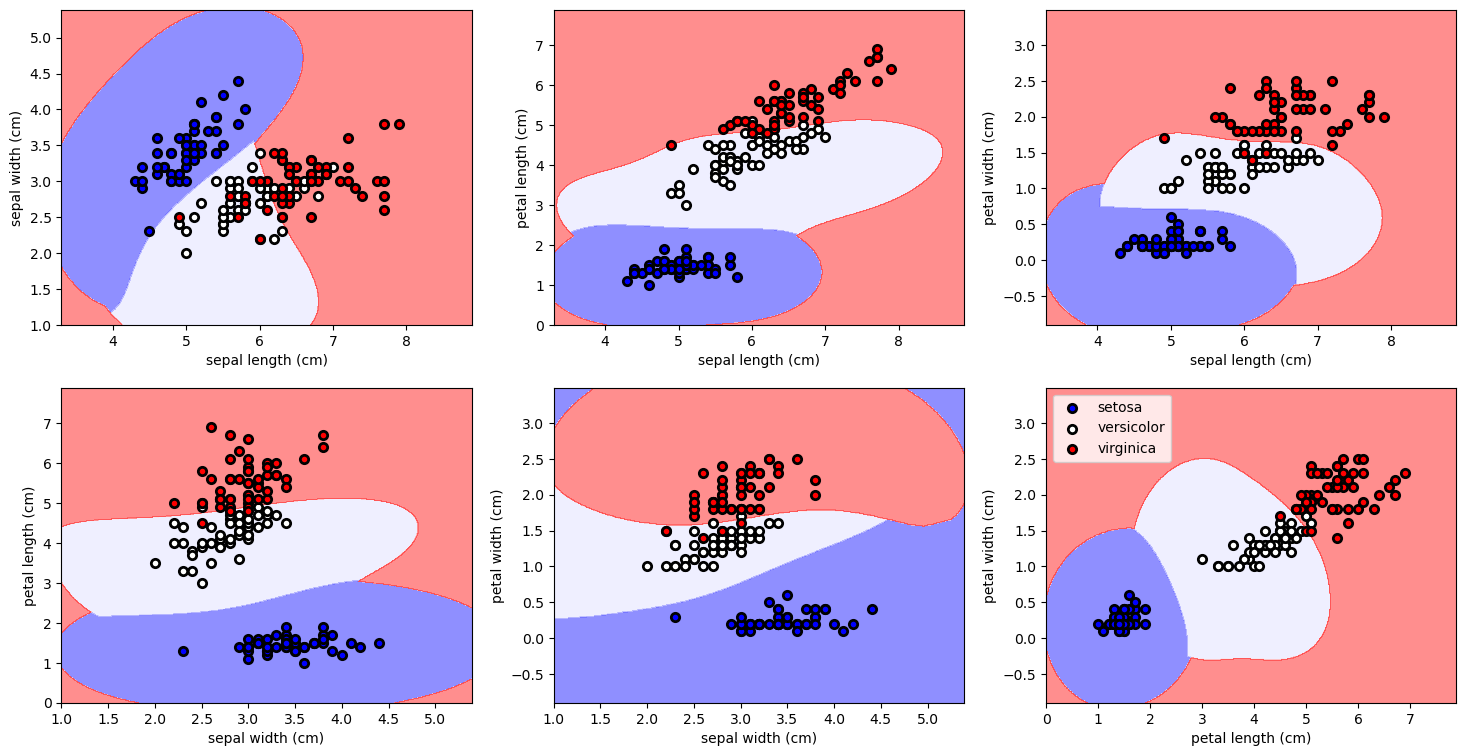

In [43]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
svc = SVC(kernel='rbf', C=1E0, gamma=1.)

n_classes = 3
colors = 'bwr'#['b','y','r']
CMAP = colors#plt.cm.rainbow
plot_step = 0.01

fig = plt.figure(1, figsize=(18, 9))

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    X = iris.data[:, pair]
    y = iris.target

    clf = svc.fit(X, y)

    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=CMAP, alpha=0.5)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])
    plt.axis("tight")

    for i, color in zip(range(n_classes), colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, edgecolor='black', lw=2, label=iris.target_names[i],
                    cmap=CMAP)

    plt.axis("tight")

plt.legend(loc='upper left')